In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "./Content/advertising.csv"):
    data = np.genfromtxt(fileName, dtype = None, delimiter = ',', skip_header =1)
    N = len(data[:, 0])
    features_X = data[:, :3]
    features_X = np.hstack((np.ones((N, 1)), features_X))
    sales_Y = data[:, 3]
    return features_X, sales_Y

In [4]:
features_X , sales_Y = load_data_from_file ()

In [5]:
def create_individual(n =4, bound =10):
    individual = []
    lower_bound = -(bound / 2)
    upper_bound = bound / 2
    for i in range(n):
        random_number = np.random.uniform(lower_bound, upper_bound)
        individual.append(random_number)

    return individual

In [6]:
individual = create_individual()
print(individual)


[1.9126680025397045, 1.3507008908506846, 3.3101743039454874, -2.0079347676408643]


In [7]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y ), (y_hat - sales_Y )).mean()
    return loss

In [8]:
loss = compute_loss(individual)
loss

np.float64(55463.720164412574)

In [9]:
def compute_fitness(individual):
    loss = compute_loss ( individual )
    fitness_value = 1/ (loss + 1)
    return fitness_value

In [14]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new , individual2_new

In [ ]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual = np.random.uniform(-5, 5)
    return individual_m

In [24]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

True


In [25]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [27]:
def selection(sorted_old_population, m = 100):
    index1 = random.randint(0, m -1)
    while True:
        index2 = random.randint(0, m -1)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1 :
        individual_s = sorted_old_population[index2]
    return individual_s

In [40]:
def create_new_population(old_population, elitism = 2, gen =1):
    m = len(old_population)
    sorted_population = sorted(old_population, key = compute_fitness)
    if gen %1 == 0:
        print ("Best loss:", compute_loss(sorted_population[m -1]), " with chromsome: ", sorted_population [m -1])
    new_population = []
    while len(new_population) < m - elitism:
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        individual_t1, individual_t2 = crossover(individual_s1, individual_s2)

        individual_m1 = mutate(individual_t1)
        individual_m2 = mutate(individual_t2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for ind in sorted_population[m - elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(sorted_population[m -1])

In [41]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism =2, gen =1)

Best loss: 123415.051528805  with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [55]:
def run_GA():
    n_generations = 100
    m = 600
    features_X , sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, losses = create_new_population(population, 2, i)
        losses_list.append(losses)
    return losses_list, population

Best loss: 1341.7691956192502  with chromsome:  [-2.3665555901525357, -0.009846462202554918, -1.2510711624218174, 0.579433475357602]
Best loss: 527.2657738294148  with chromsome:  [-1.3854658833787026, 0.047639998386933335, 0.08498370468210936, 0.7662896347738393]
Best loss: 527.2657738294148  with chromsome:  [-1.3854658833787026, 0.047639998386933335, 0.08498370468210936, 0.7662896347738393]
Best loss: 63.031508514703056  with chromsome:  [-4.744074229310221, 0.05306415447024726, -0.06992907862325382, 0.3575521838792213]
Best loss: 63.031508514703056  with chromsome:  [-4.744074229310221, 0.05306415447024726, -0.06992907862325382, 0.3575521838792213]
Best loss: 63.031508514703056  with chromsome:  [-4.744074229310221, 0.05306415447024726, -0.06992907862325382, 0.3575521838792213]
Best loss: 55.67773625075566  with chromsome:  [-1.3854658833787026, 0.05306415447024726, -0.06992907862325382, 0.3575521838792213]
Best loss: 55.34414352912468  with chromsome:  [-2.059969593025727, 0.05306

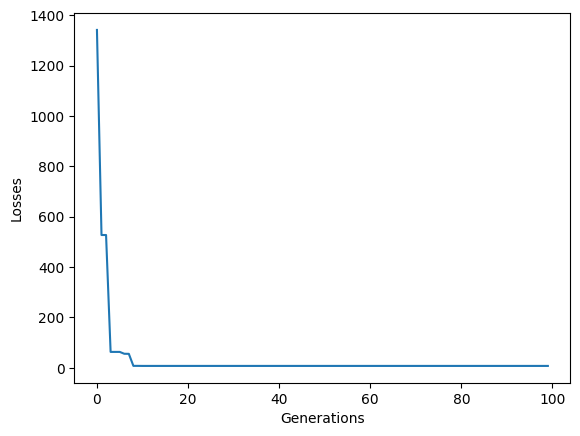

In [57]:
import matplotlib.pyplot as plt
def visualize_loss(losses_list):
    plt.plot(losses_list)
    plt.xlabel("Generations")
    plt.ylabel("Losses")
losses_list, population = run_GA()
visualize_loss(losses_list)

[4.550980096188736, 0.05306415447024726, -0.003088789216451282, 0.09702096419866724]


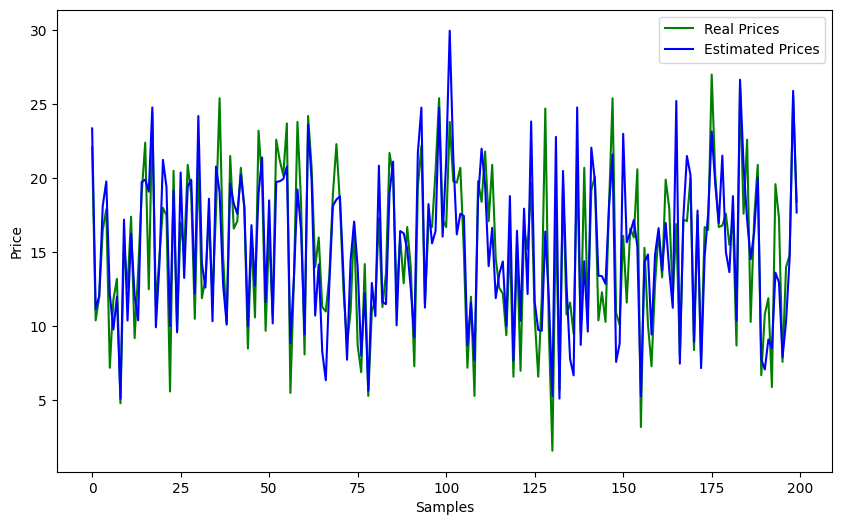

In [66]:
def visualize_predict_gt():
    sorted_population = sorted(population, key = compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])
    estimated_prices = []
    for feature in features_X:
        estimated_prices.append(feature.dot(theta))

    fig, ax = plt.subplots(figsize =(10 , 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c = 'green', label = 'Real Prices')
    plt.plot(estimated_prices, c = 'blue', label = 'Estimated Prices')
    plt.legend()
    plt.show()
visualize_predict_gt()